#### Dataset1: id:18--18-18-1 Dataset2: id:18-18--18-1

#### Dataset 1

In [139]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

#to visualize data
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns; sns.set(font_scale = 1.2)

In [140]:
data = pd.read_csv('week4_ds1.csv')
data.reset_index(inplace=True)
data.columns = ['X1', 'X2', 'y']
data.head()

,X1,X2,y
0,0.27,-0.60,-1
1,-0.78,-0.97,-1
2,-0.71,0.99,1
3,0.72,0.18,-1
4,0.34,-0.22,1


In [141]:
df = data.copy()
df.head()

,X1,X2,y
0,0.27,-0.60,-1
1,-0.78,-0.97,-1
2,-0.71,0.99,1
3,0.72,0.18,-1
4,0.34,-0.22,1


In [142]:
X1 = df.iloc[:,0]
X2 = df.iloc[:,1]
X=np.column_stack((X1,X2))
y= df.iloc[:,2]

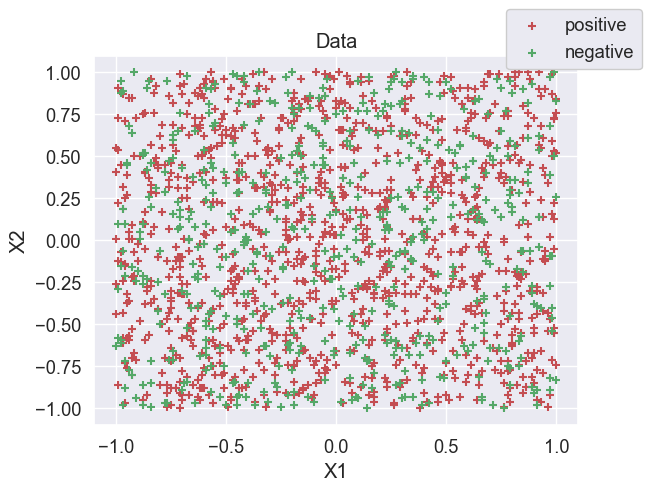

In [169]:
plt.scatter(X1[y==1], X2[y==1], marker = '+', c = 'r',label="positive")
plt.scatter(X1[y==-1], X2[y==-1], marker = '+', c = 'g',label='negative')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Data')
plt.legend(bbox_to_anchor=(1.15,1.15), loc='upper right',fancybox=True, framealpha=1) 
# plt.show()
plt.savefig('ds1_0.png')

# Answer (a)

c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scik

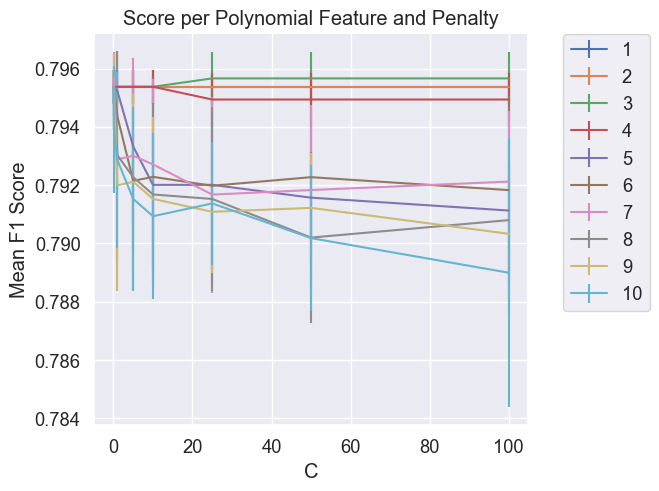

In [144]:
def check_for_C(x,y,poly_degrees, C_range):
  for degree in poly_degrees:
    mean_error=[]
    std_error=[]
    x_poly=PolynomialFeatures(degree).fit_transform(x)
    for c in C_range:
      LRModel=LogisticRegression(penalty='l2',C=c)
      scores=cross_val_score(LRModel,x_poly,y,cv=5,scoring='f1')
      mean_error.append(np.array(scores).mean())
      std_error.append(np.array(scores).std())
      # if(degree==3):
      #   print(f'{c}:{degree}:{np.array(scores).mean()}')

    plt.errorbar(C_range, mean_error, yerr=std_error, label=f'{degree}')
    plt.rc("font", size=15); plt.rcParams['figure.constrained_layout.use'] = True
    plt.xlabel('C')
    plt.ylabel('Mean F1 Score')
    plt.legend(bbox_to_anchor=(1.3, 1.02))
    # plt.show()

poly_degree=[1,2,3,4,5,6,7,8,9,10]
C_range=[0.01, 0.1, 1, 5, 10, 25, 50, 100]
check_for_C(X,y,poly_degree,C_range)
plt.title('Score per Polynomial Feature and Penalty')
# plt.show()
plt.savefig('ds1_a.png')

# Answer (b)

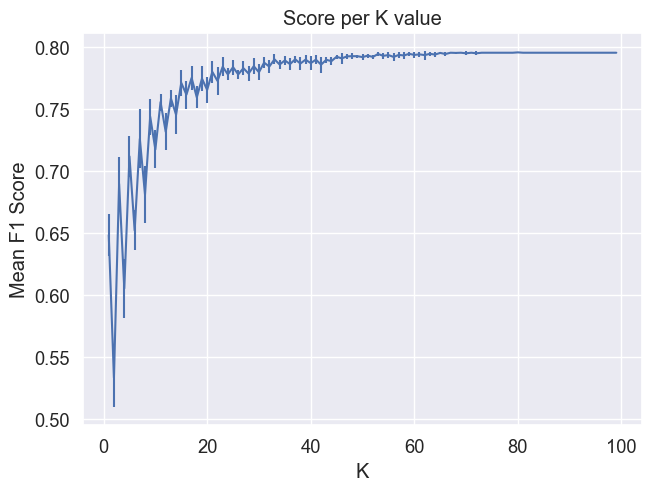

In [145]:
def check_for_k(k_range,x,y,step):
  mean_error=[]
  std_error=[]
  for k in k_range:
    KNNModel=KNeighborsClassifier(k)
    score=cross_val_score(KNNModel,x,y,cv=5, scoring='f1')
    mean_error.append(np.array(score).mean())
    std_error.append(np.array(score).std())
  plt.rc('font', size=18)
  plt.rcParams['figure.constrained_layout.use'] = True
  plt.errorbar(list(range(1,100,step)),mean_error,yerr=std_error)
  plt.xlabel('K')
  plt.ylabel('Mean F1 Score')
  plt.title('Score per K value')
step=1
k_range=np.arange(start=1,stop=100,step=step)
check_for_k(k_range,X,y,step)
plt.savefig('ds1_b.png')

# Answer (c)

#### KNN Model:

In [146]:
KNN_x_train,KNN_x_test,KNN_y_train,KNN_y_test=train_test_split(X,y,test_size=0.2)
KNNModel=KNeighborsClassifier(40).fit(KNN_x_train,KNN_y_train)
KNN_predictions=KNNModel.predict(KNN_x_test)
print(f'The confusion matrix for KNN Model is:\n\n{confusion_matrix(KNN_y_test,KNN_predictions)}')
print(f'The Classification Report for KNN Model is:\n\n{classification_report(KNN_y_test,KNN_predictions)}')

The confusion matrix for KNN Model is:

[[  2 105]
 [  7 220]]
The Classification Report for KNN Model is:

              precision    recall  f1-score   support

          -1       0.22      0.02      0.03       107
           1       0.68      0.97      0.80       227

    accuracy                           0.66       334
   macro avg       0.45      0.49      0.42       334
weighted avg       0.53      0.66      0.55       334



### Logistic Regression Model:

In [147]:
LR_x_poly=PolynomialFeatures(degree=3).fit_transform(X)
LR_x_train,LR_x_test,LR_y_train,LR_y_test=train_test_split(LR_x_poly,y,test_size=0.2)
LRModel=LogisticRegression(C=25).fit(LR_x_train,LR_y_train)
LR_predictions=LRModel.predict(LR_x_test)
print(f'The confusion matrix for LR Model is:\n\n{confusion_matrix(LR_y_test,LR_predictions)}')
print(f'The Classification Report for LR Model is:\n\n{classification_report(LR_y_test,LR_predictions)}')

The confusion matrix for LR Model is:

[[  0 114]
 [  0 220]]
The Classification Report for LR Model is:

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       114
           1       0.66      1.00      0.79       220

    accuracy                           0.66       334
   macro avg       0.33      0.50      0.40       334
weighted avg       0.43      0.66      0.52       334



c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

#### Baseline Classifier:

In [148]:
random_Model=DummyClassifier(strategy="uniform").fit(X,y)
random_predictions=random_Model.predict(X)
print(f'The confusion matrix for Random Model is:\n\n{confusion_matrix(y,random_predictions)}')
print(f'The Classification Report for Random Model is:\n\n{classification_report(y,random_predictions)}')
most_frequent_Model=DummyClassifier(strategy="most_frequent").fit(X,y)
most_frequent_predictions=most_frequent_Model.predict(X)
print(f'The confusion matrix for Most Frequent Model is:\n\n{confusion_matrix(y,most_frequent_predictions)}')
print(f'The Classification Report for Most Frequent Model is:\n\n{classification_report(y,most_frequent_predictions)}')

The confusion matrix for Random Model is:

[[291 275]
 [568 532]]
The Classification Report for Random Model is:

              precision    recall  f1-score   support

          -1       0.34      0.51      0.41       566
           1       0.66      0.48      0.56      1100

    accuracy                           0.49      1666
   macro avg       0.50      0.50      0.48      1666
weighted avg       0.55      0.49      0.51      1666

The confusion matrix for Most Frequent Model is:

[[   0  566]
 [   0 1100]]
The Classification Report for Most Frequent Model is:

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       566
           1       0.66      1.00      0.80      1100

    accuracy                           0.66      1666
   macro avg       0.33      0.50      0.40      1666
weighted avg       0.44      0.66      0.53      1666



c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [149]:
KNN_probability=KNNModel.predict_proba(X)
most_frequent_probability=most_frequent_Model.predict_proba(X)
random_probability=random_Model.predict_proba(X)
fpr, tpr, _ = roc_curve(y, LRModel.decision_function(LR_x_poly))
knn_fpr, knn_tpr, thresh = roc_curve(y, KNN_probability[:, 1])
most_freq_fpr, most_freq_tpr, thresh = roc_curve(y, most_frequent_probability[:, 1])
rand_fpr, rand_tpr, thresh = roc_curve(y, random_probability[:, 1])


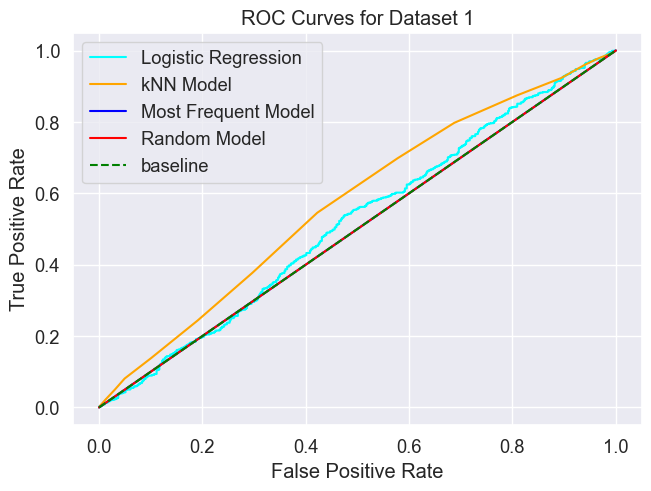

In [150]:
plt.rc('font', size=20)
plt.plot(fpr, tpr, color='cyan',label='Logistic Regression')
plt.plot(knn_fpr, knn_tpr, color='orange',label='kNN Model')
plt.plot(most_freq_fpr, most_freq_tpr, color='blue',label='Most Frequent Model')
plt.plot(rand_fpr, rand_tpr, color='red', label='Random Model')
plt.plot([0, 1], [0, 1], color='green', linestyle='--',label='baseline')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title(
    "ROC Curves for Dataset 1")
plt.legend()
# plt.show()
plt.savefig('ds1_d.png')

#### Dataset 2

In [151]:
data1 = pd.read_csv('week4_ds2.csv')
data1.reset_index(inplace=True)
data1.columns = ['X1', 'X2', 'y']
data1.head()

,X1,X2,y
0,0.54,0.75,-1
1,-0.50,-0.76,1
2,0.16,0.30,-1
3,-0.02,0.72,-1
4,-0.44,-0.76,1


In [152]:
df1 = data1.copy()
df1.head()

,X1,X2,y
0,0.54,0.75,-1
1,-0.50,-0.76,1
2,0.16,0.30,-1
3,-0.02,0.72,-1
4,-0.44,-0.76,1


In [153]:
D2_X1 = df1.iloc[:,0]
D2_X2 = df1.iloc[:,1]
D2_X=np.column_stack((D2_X1,D2_X2))
D2_y= df1.iloc[:,2]

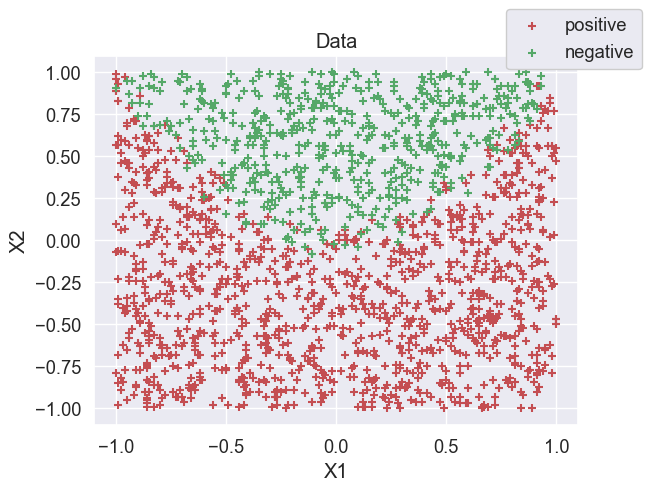

In [170]:
plt.scatter(D2_X1[D2_y==1], D2_X2[D2_y==1], marker = '+', c = 'r',label="positive")
plt.scatter(D2_X1[D2_y==-1], D2_X2[D2_y==-1], marker = '+', c = 'g',label='negative')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Data')
plt.legend(bbox_to_anchor=(1.15,1.15), loc='upper right',fancybox=True, framealpha=1) 
# plt.show()
plt.savefig('ds2_0.png')

# Answer (a)

c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scik

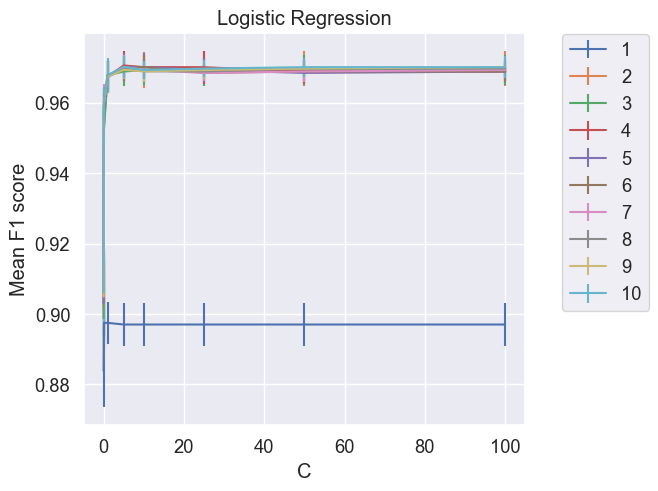

In [164]:
def check_for_C(x,y,poly_degrees, C_range):
  for degree in poly_degrees:
    mean_error=[]
    std_error=[]
    x_poly=PolynomialFeatures(degree).fit_transform(x)
    for c in C_range:
      LRModel=LogisticRegression(penalty='l2',C=c)
      scores=cross_val_score(LRModel,x_poly,y,cv=5,scoring='f1')
      mean_error.append(np.array(scores).mean())
      std_error.append(np.array(scores).std())
      # if(degree==4):
      #   print(f'{c}:{degree}:{scores.mean()}')
    plt.errorbar(C_range, mean_error, yerr=std_error, label=f'{degree}')
    plt.rc("font", size=18); plt.rcParams['figure.constrained_layout.use'] = True
    plt.xlabel('C')
    plt.ylabel('Mean F1 score')
    plt.legend(bbox_to_anchor=(1.3, 1.02))
    # plt.show()

poly_degree=[1,2,3,4,5,6,7,8,9,10]
C_range=[0.01, 0.1, 1, 5, 10, 25, 50, 100]
check_for_C(D2_X,D2_y,poly_degree,C_range)
plt.title('Logistic Regression')
# plt.show()
plt.savefig('ds2_a.png')

# Answer (b)

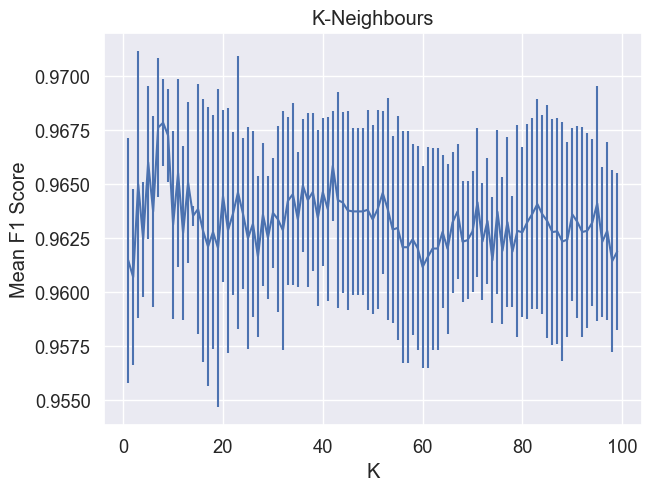

In [165]:
def check_for_k(k_range,x,y,step):
  mean_error=[]
  std_error=[]
  for k in k_range:
    KNNModel=KNeighborsClassifier(k)
    score=cross_val_score(KNNModel,x,y,cv=5, scoring='f1')
    mean_error.append(np.array(score).mean())
    std_error.append(np.array(score).std())
    # print(f'k: {k}; score:{score.mean()}')
  plt.rc('font', size=18)
  plt.rcParams['figure.constrained_layout.use'] = True
  plt.errorbar(list(range(1,100,step)),mean_error,yerr=std_error)
  plt.xlabel('K')
  plt.ylabel('Mean F1 Score')
  plt.title('K-Neighbours')
step=1
k_range=np.arange(start=1,stop=100,step=step)
check_for_k(k_range,D2_X,D2_y,step)
plt.savefig('ds2_b.png')

# Answer (c)

#### KNN Model:

In [157]:
KNN_x_train,KNN_x_test,KNN_y_train,KNN_y_test=train_test_split(D2_X,D2_y,test_size=0.2)
KNNModel=KNeighborsClassifier(8).fit(KNN_x_train,KNN_y_train)
KNN_predictions=KNNModel.predict(KNN_x_test)
print(f'The confusion matrix for KNN Model is:\n\n{confusion_matrix(KNN_y_test,KNN_predictions)}')
print(f'The Classification Report for KNN Model is:\n\n{classification_report(KNN_y_test,KNN_predictions)}')

The confusion matrix for KNN Model is:

[[109   6]
 [  6 225]]
The Classification Report for KNN Model is:

              precision    recall  f1-score   support

          -1       0.95      0.95      0.95       115
           1       0.97      0.97      0.97       231

    accuracy                           0.97       346
   macro avg       0.96      0.96      0.96       346
weighted avg       0.97      0.97      0.97       346



#### Logistic Regression Model:

In [158]:
LR_x_poly=PolynomialFeatures(degree=4).fit_transform(D2_X)
LR_x_train,LR_x_test,LR_y_train,LR_y_test=train_test_split(LR_x_poly,D2_y,test_size=0.2)
LRModel=LogisticRegression(C=10).fit(LR_x_train,LR_y_train)
LR_predictions=LRModel.predict(LR_x_test)
print(f'The confusion matrix for LR Model is:\n\n{confusion_matrix(LR_y_test,LR_predictions)}')
print(f'The Classification Report for LR Model is:\n\n{classification_report(LR_y_test,LR_predictions)}')

The confusion matrix for LR Model is:

[[109   8]
 [  6 223]]
The Classification Report for LR Model is:

              precision    recall  f1-score   support

          -1       0.95      0.93      0.94       117
           1       0.97      0.97      0.97       229

    accuracy                           0.96       346
   macro avg       0.96      0.95      0.95       346
weighted avg       0.96      0.96      0.96       346



#### Baseline Classifier:

In [159]:
random_Model=DummyClassifier(strategy="uniform").fit(D2_X,D2_y)
random_predictions=random_Model.predict(D2_X)
print(f'The confusion matrix for Random Model is:\n\n{confusion_matrix(D2_y,random_predictions)}')
print(f'The Classification Report for Random Model is:\n\n{classification_report(D2_y,random_predictions)}')
most_frequent_Model=DummyClassifier(strategy="most_frequent").fit(D2_X,D2_y)
most_frequent_predictions=most_frequent_Model.predict(D2_X)
print(f'The confusion matrix for Most Frequent Model is:\n\n{confusion_matrix(D2_y,most_frequent_predictions)}')
print(f'The Classification Report for Most Frequent Model is:\n\n{classification_report(D2_y,most_frequent_predictions)}')

The confusion matrix for Random Model is:

[[283 279]
 [614 554]]
The Classification Report for Random Model is:

              precision    recall  f1-score   support

          -1       0.32      0.50      0.39       562
           1       0.67      0.47      0.55      1168

    accuracy                           0.48      1730
   macro avg       0.49      0.49      0.47      1730
weighted avg       0.55      0.48      0.50      1730

The confusion matrix for Most Frequent Model is:

[[   0  562]
 [   0 1168]]
The Classification Report for Most Frequent Model is:

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       562
           1       0.68      1.00      0.81      1168

    accuracy                           0.68      1730
   macro avg       0.34      0.50      0.40      1730
weighted avg       0.46      0.68      0.54      1730



c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [160]:
KNN_probability=KNNModel.predict_proba(D2_X)
most_frequent_probability=most_frequent_Model.predict_proba(D2_X)
random_probability=random_Model.predict_proba(D2_X)
fpr, tpr, _ = roc_curve(D2_y, LRModel.decision_function(LR_x_poly))
knn_fpr, knn_tpr, thresh = roc_curve(D2_y, KNN_probability[:, 1])
most_freq_fpr, most_freq_tpr, thresh = roc_curve(D2_y, most_frequent_probability[:, 1])
rand_fpr, rand_tpr, thresh = roc_curve(D2_y, random_probability[:, 1])


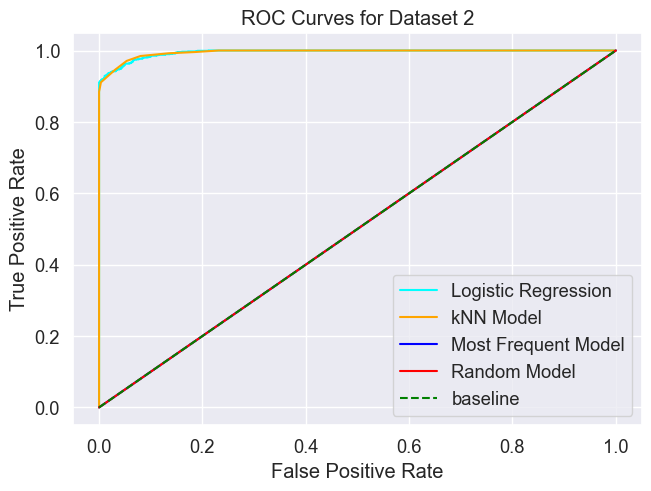

In [168]:
plt.rc('font', size=20)
plt.plot(fpr, tpr, color='cyan',label='Logistic Regression')
plt.plot(knn_fpr, knn_tpr, color='orange',label='kNN Model')
plt.plot(most_freq_fpr, most_freq_tpr, color='blue',label='Most Frequent Model')
plt.plot(rand_fpr, rand_tpr, color='red', label='Random Model')
plt.plot([0, 1], [0, 1], color='green', linestyle='--',label='baseline')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title(
    "ROC Curves for Dataset 2")
plt.legend()
# plt.show()
plt.savefig('ds2_d.png')